In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import GridSearchCV,train_test_split
from imblearn.over_sampling import  SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load Data
df1 = pd.read_csv('..\data\VirtualScreeningData\AID688red_test.csv')
df2 = pd.read_csv('..\data\VirtualScreeningData\AID688red_train.csv')

In [3]:
# Combine Data
df = pd.concat([df1,df2])

In [4]:
df.dtypes

NEG_01_NEG      int64
NEG_02_NEG      int64
NEG_03_NEG      int64
NEG_04_NEG      int64
NEG_05_NEG      int64
               ...   
NumHBD          int64
MW            float64
BBB             int64
BadGroup        int64
Outcome        object
Length: 154, dtype: object

In [5]:
df['Outcome'] = df['Outcome'].replace({'Active': 1, 'Inactive': 0})

In [6]:
# Basic Data Analysis
df.shape[0]

27189

In [7]:
df.duplicated().sum()

9

In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

NEG_01_NEG    0
NEG_02_NEG    0
NEG_03_NEG    0
NEG_04_NEG    0
NEG_05_NEG    0
             ..
NumHBD        0
MW            0
BBB           0
BadGroup      0
Outcome       0
Length: 154, dtype: int64

In [10]:
df.value_counts('Outcome') # HIGHLY IMBALANCED DATA

Outcome
0    26932
1      248
dtype: int64

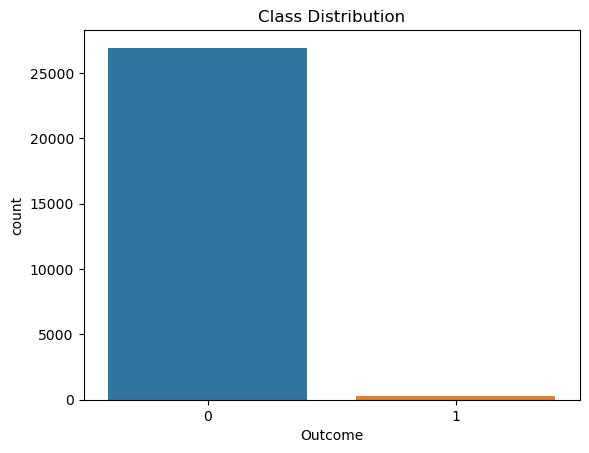

In [11]:
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()

In [12]:
x = df.drop('Outcome',axis=1)
y = df[['Outcome']]

In [13]:
# Handle Imbalance with SMOTE
oversample=SMOTE()
X,Y=oversample.fit_resample(x,y)
Y.value_counts()

Outcome
0          26932
1          26932
dtype: int64

In [14]:
# Data Splitting
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
# Model Dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN Classifier': KNeighborsClassifier()
}


In [16]:
# Hyperparameters for GridSearchCV
params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Adaboost': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [100, 200, 300]},
    'KNN Classifier': {'n_neighbors': [3, 5, 7, 9]}
}

In [17]:
# Results DataFrame
results = []
y_test_res = pd.DataFrame()
y_test_res['Actual'] = y_test

# Model Training with GridSearchCV
best_models = {}

In [18]:
# Model Training with GridSearchCV
for name, model in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params[name], cv=3, scoring='accuracy')
    grid.fit(x_train, y_train.values.ravel())
    best_model = grid.best_estimator_
    best_models[name] = best_model
    print(f"{name} Training Complete.")

    # Model Predictions
    y_pred = best_model.predict(x_test)
    y_test_res[name] = y_pred

    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, precision, recall, f1])


Training Logistic Regression...


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Training Complete.
Training Random Forest...
Random Forest Training Complete.
Training Adaboost...
Adaboost Training Complete.
Training XGBoost...
XGBoost Training Complete.
Training KNN Classifier...


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN Classifier Training Complete.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
# Results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [20]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.897614,0.891833,0.907706,0.899700
1,Random Forest,0.994059,0.998150,0.990092,0.994105
2,Adaboost,0.950524,0.942574,0.960734,0.951567
3,XGBoost,0.993131,0.995028,0.991376,0.993199
4,KNN Classifier,0.901049,0.836609,0.999633,0.910884


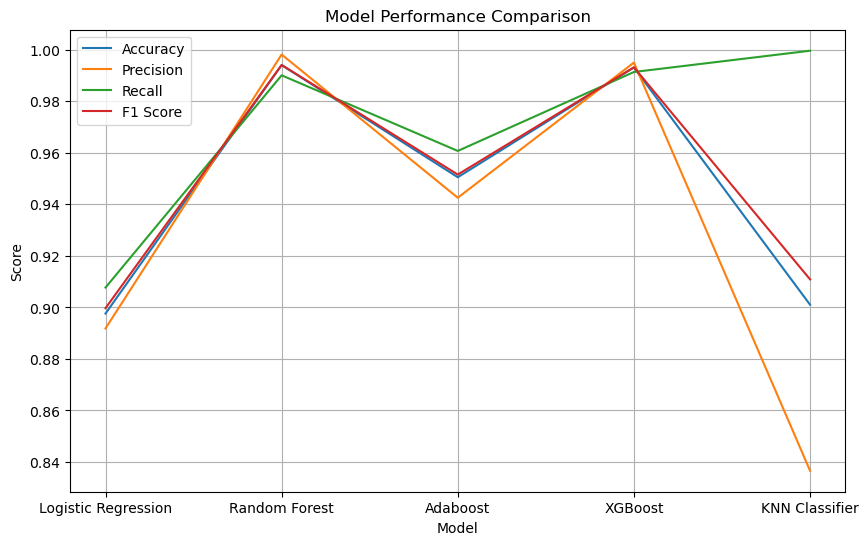

In [21]:
# Plot Line Chart for Accuracy
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Model'], results_df[metric], label=metric)

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

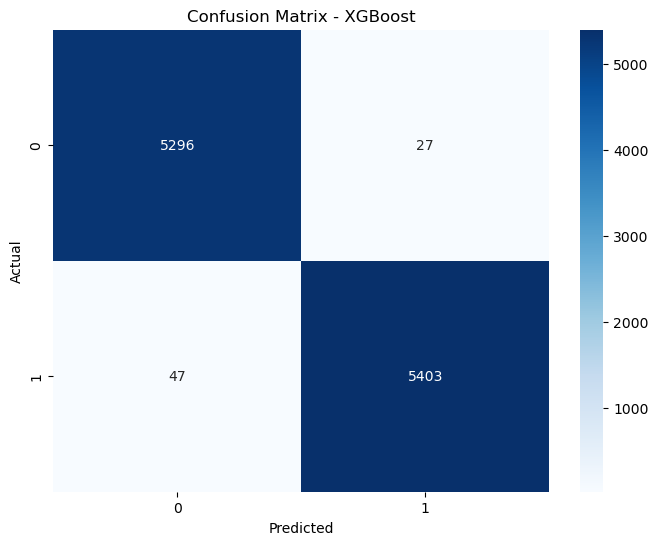

In [22]:
# Plot Confusion Matrix for XGBoost
cm = confusion_matrix(y_test, y_test_res['XGBoost'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Save XGBoost Model
joblib.dump(best_models['XGBoost'],'../models/AID688.lb')

['../models/AID688.lb']